## Libraries

In [1]:
#!pip install root_numpy
import root_numpy
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from scipy import stats
from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText
from ROOT import gROOT

#sns.set_style('whitegrid')

font = 20

Welcome to JupyROOT 6.24/08


## Functions

In [2]:
def root_TH2_name(root_file):
    pic = []
    for i,e in enumerate(root_file.GetListOfKeys()):
        che = e.GetName()
        if 'pic_' in che:
            pic.append(che)
    return pic

## Analysing reconstructed run - Cygno preprocessing

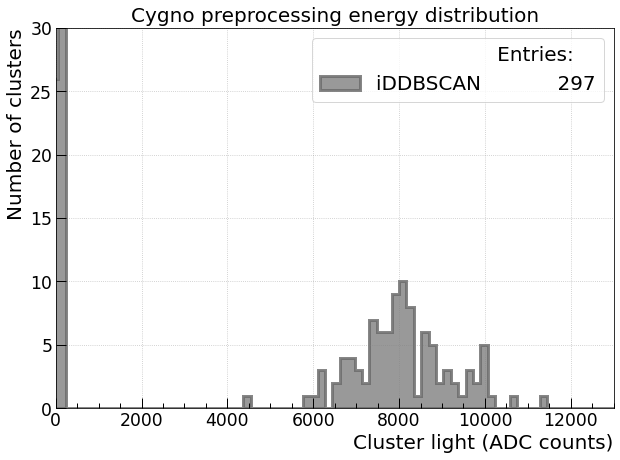

In [11]:
filename = '/jupyter-workspace/private/reco_gui/reco_files/simulation_6kev/reco_run20001_3D_cygno_p1_r4.root'

cor = 'dimgray'
face = 'gray'
lwidth = 3
bins= 80
font = 20

begin = 200
end = 300

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(0,0,'w',marker=None)

tf = ROOT.TFile(filename)
tree = tf.Get('Events')

cut = " event > 199 && sc_integral > 0"

track_integral = root_numpy.tree2array(tree, branches = 'sc_integral', object_selection={cut: ['sc_integral']})    
test = track_integral.copy()
track_integral = np.unique(np.hstack(track_integral))
ent = len(track_integral)

plt.hist(track_integral, bins=bins, range=[-800,13000], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)

plt.title("Cygno preprocessing energy distribution",fontsize =font)          
plt.legend(["                   Entries:","iDDBSCAN            %d" %(ent)],fontsize=font)
plt.xlabel("Cluster light (ADC counts)",fontsize=font, horizontalalignment='right', x=1.0)
plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
plt.grid(color='gray', linestyle=':', alpha = 0.5)
plt.xlim([0,13000])
#plt.ylim([0,60])
plt.ylim([0,30])
#plt.yscale("log")

ax = plt.gca()
ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major',direction="in", length=10, width=1)
ax.tick_params(which='minor',direction="in", length=5, width=1)

In [12]:
cut = "event > 199 && sc_integral < 3000"

track_integral = root_numpy.tree2array(tree, branches = 'sc_integral', object_selection={cut: ['sc_integral']})    
track_integral, indint  = np.unique(np.hstack(track_integral), return_index = True)

track_xmean = root_numpy.tree2array(tree, branches = 'sc_xmean', object_selection={cut: ['sc_xmean']})
track_xmean = np.hstack(track_xmean)
track_xmean = track_xmean[indint]

track_ymean = root_numpy.tree2array(tree, branches = 'sc_ymean', object_selection={cut: ['sc_ymean']})
track_ymean = np.hstack(track_ymean)
track_ymean = track_ymean[indint]

track_nhits = root_numpy.tree2array(tree, branches = 'sc_nhits', object_selection={cut: ['sc_nhits']})
track_nhits = np.hstack(track_nhits)
track_nhits = track_nhits[indint]



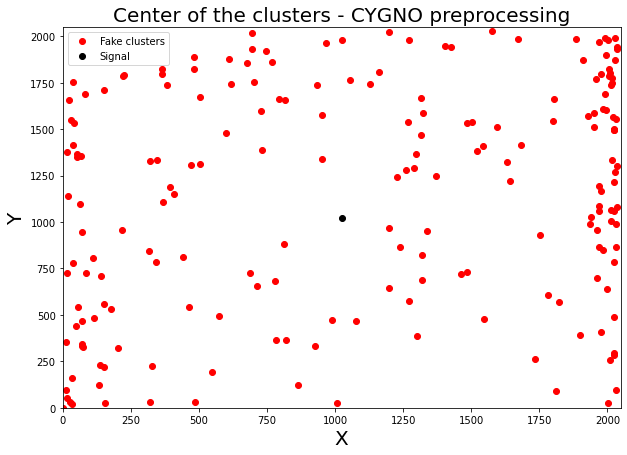

In [13]:
plt.figure(figsize = [10,7])

for i in range(len(track_xmean)):
    if i == 0:
        plt.plot(track_xmean[i], track_ymean[i], 'o', color = 'red', label = 'Fake clusters')
    else:
        plt.plot(track_xmean[i], track_ymean[i], 'o', color = 'red')

plt.xlim(0,2048)
plt.ylim(0,2048)

plt.plot(1024,1024, 'o', color = 'k', label = 'Signal')
plt.title('Center of the clusters - CYGNO preprocessing', fontsize = font)
plt.xlabel('X', fontsize = font)
plt.ylabel('Y', fontsize = font)

plt.legend()

## Analysing reconstructed run - Cygno preprocessing sigma 1.4

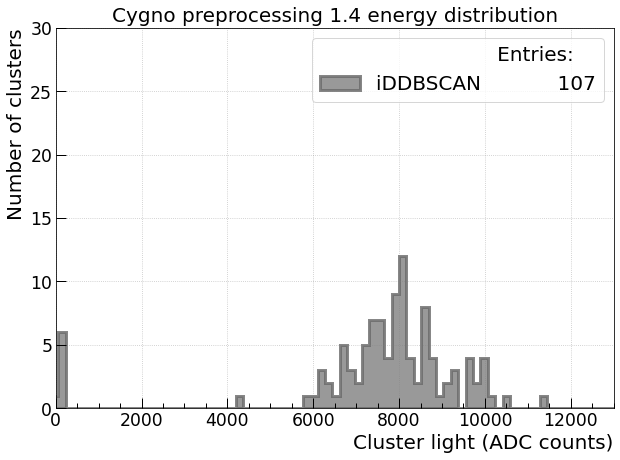

In [14]:
filename = '/jupyter-workspace/private/reco_gui/reco_files/simulation_6kev/reco_run20001_3D_cygno14_p1_r4.root'

cor = 'dimgray'
face = 'gray'
lwidth = 3
bins= 80
font = 20

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(0,0,'w',marker=None)

tf = ROOT.TFile(filename)
tree = tf.Get('Events')

cut = " event > 199 && sc_integral > 0"

track_integral = root_numpy.tree2array(tree, branches = 'sc_integral' , object_selection={cut: ['sc_integral']})    
test = track_integral.copy()
track_integral = np.unique(np.hstack(track_integral))
ent = len(track_integral)

plt.hist(track_integral, bins=bins, range=[-800,13000], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)

plt.title("Cygno preprocessing 1.4 energy distribution",fontsize =font)          
plt.legend(["                   Entries:","iDDBSCAN            %d" %(ent)],fontsize=font)
plt.xlabel("Cluster light (ADC counts)",fontsize=font, horizontalalignment='right', x=1.0)
plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
plt.grid(color='gray', linestyle=':', alpha = 0.5)
plt.xlim([0,13000])
#plt.ylim([0,60])
plt.ylim([0,30])
#plt.yscale("log")

ax = plt.gca()
ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major',direction="in", length=10, width=1)
ax.tick_params(which='minor',direction="in", length=5, width=1)

## Analysing reconstructed run - Unet

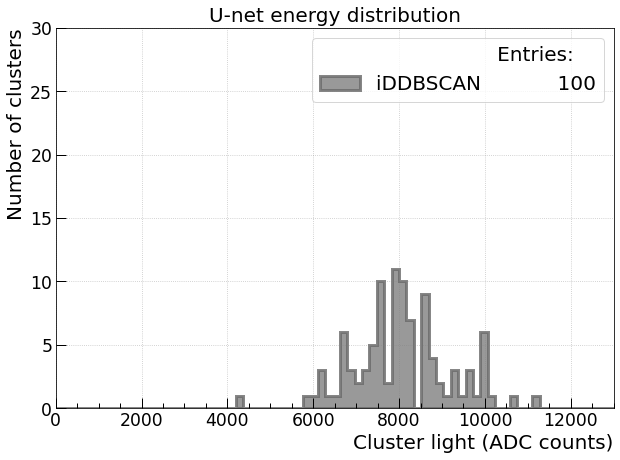

In [15]:
filename = '/jupyter-workspace/private/reco_gui/reco_files/simulation_6kev/reco_run20001_3D_unet_p1_r4_updated.root'

cor = 'dimgray'
face = 'gray'
lwidth = 3
bins= 80
font = 20

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(0,0,'w',marker=None)

tf = ROOT.TFile(filename)
tree = tf.Get('Events')

cut = " event > 199 && sc_integral > 0"

track_integral = root_numpy.tree2array(tree, branches = 'sc_integral', object_selection={cut: ['sc_integral']})    
test = track_integral.copy()
track_integral = np.unique(np.hstack(track_integral))
ent = len(track_integral)

plt.hist(track_integral, bins=bins, range=[-800,13000], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)

plt.title("U-net energy distribution",fontsize =font)          
plt.legend(["                   Entries:","iDDBSCAN            %d" %(ent)],fontsize=font)
plt.xlabel("Cluster light (ADC counts)",fontsize=font, horizontalalignment='right', x=1.0)
plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
plt.grid(color='gray', linestyle=':', alpha = 0.5)
plt.xlim([0,13000])
#plt.ylim([0,60])
plt.ylim([0,30])
#plt.yscale("log")

ax = plt.gca()
ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major',direction="in", length=10, width=1)
ax.tick_params(which='minor',direction="in", length=5, width=1)

## Analysing reconstructed run - Median

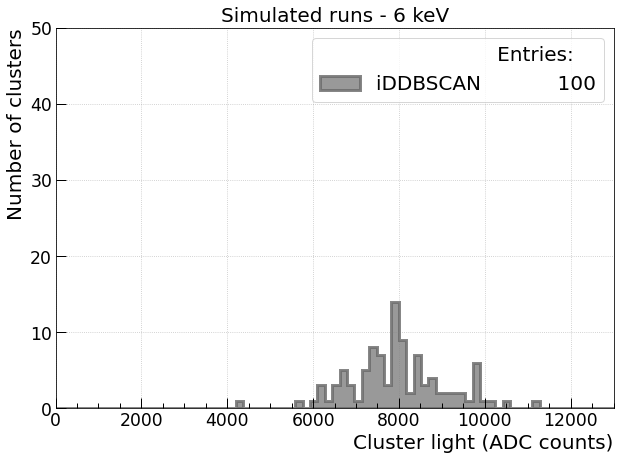

In [17]:
filename = '/jupyter-workspace/private/reco_gui/reco_files/simulation_6kev/reco_run20001_3D_median_p1_r4.root'

cor = 'dimgray'
face = 'gray'
lwidth = 3
bins= 80
font = 20

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(0,0,'w',marker=None)

tf = ROOT.TFile(filename)
tree = tf.Get('Events')

cut = " event > 199 && sc_integral > 0"

track_integral = root_numpy.tree2array(tree, branches = 'sc_integral', object_selection={cut: ['sc_integral']})    
test = track_integral.copy()
track_integral = np.unique(np.hstack(track_integral))
ent = len(track_integral)

plt.hist(track_integral, bins=bins, range=[-800,13000], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)

plt.title("Simulated runs - 6 keV",fontsize =font)          
plt.legend(["                   Entries:","iDDBSCAN            %d" %(ent)],fontsize=font)
plt.xlabel("Cluster light (ADC counts)",fontsize=font, horizontalalignment='right', x=1.0)
plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
plt.grid(color='gray', linestyle=':', alpha = 0.5)
plt.xlim([0,13000])
#plt.ylim([0,60])
plt.ylim([0,50])
#plt.yscale("log")

ax = plt.gca()
ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major',direction="in", length=10, width=1)
ax.tick_params(which='minor',direction="in", length=5, width=1)

## Analysing signal runs

In [18]:
filepath = '/jupyter-workspace/private/runs/runs_fe/'

iron_integral = []

for i in range(1,11):
    filename = 'histograms_Run%05d.root' %(i)
    
    f = ROOT.TFile(filepath + filename)
    pic = root_TH2_name(f)
    
    for k in range(len(pic)):
        img = root_numpy.hist2array(f.Get(pic[k]))
        iron_integral.append(sum(sum(img)))
        
    print('Run %d done.' %(i))
iron_integral = np.asarray(iron_integral)

Run 1 done.
Run 2 done.
Run 3 done.
Run 4 done.
Run 5 done.
Run 6 done.
Run 7 done.
Run 8 done.
Run 9 done.
Run 10 done.


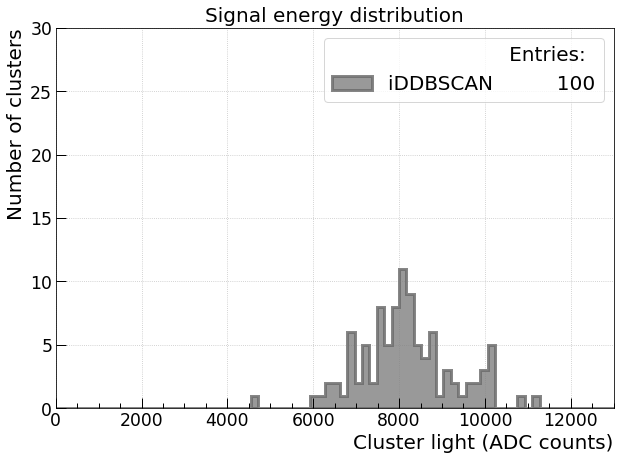

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(0,0,'w',marker=None)

ent = len(np.ones(100))

plt.hist(iron_integral[200:300], bins=bins, range=[-800,13000], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)

plt.title("Signal energy distribution",fontsize =font)       
plt.legend(["                   Entries:","iDDBSCAN          100"],fontsize=font)
plt.xlabel("Cluster light (ADC counts)",fontsize=font, horizontalalignment='right', x=1.0)
plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
plt.grid(color='gray', linestyle=':', alpha = 0.5)
plt.xlim([0,13000])
#plt.ylim([0,60])
plt.ylim([0,30])
#plt.yscale("log")

ax = plt.gca()
ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major',direction="in", length=10, width=1)
ax.tick_params(which='minor',direction="in", length=5, width=1)

In [22]:
filter_list = ['gaussian', 'median', 'mean', 'unet', 'cygno', 'cygno14']

diffs = []

for filt in filter_list:
    filepath = '/jupyter-workspace/private/reco_gui/reco_files/simulation_6kev/'
    if filt == 'unet':
        reconame = 'reco_run20001_3D_%s_p1_r4_updated.root' % (filt)
    else:
        reconame = 'reco_run20001_3D_%s_p1_r4.root' % (filt)
    filename = filepath + reconame

    f = ROOT.TFile(filename)
    tree = f.Get('Events')
    track_integral = np.hstack(root_numpy.tree2array(tree, branches = 'sc_integral'))
    ent = len(track_integral)


    print('O filtro %s encontrou %d clusters' %(filt, ent))

    sig_int = track_integral[track_integral > 3000]

    signal_clusters = len(sig_int)
    if signal_clusters == 300:
        diff = sig_int - iron_integral
        diff_percent = np.array([100*diff[i]/iron_integral[i] for i in range(200,300)])
        
        diffs.append(diff_percent)

        print('A diferença média de energia é: %.4f \u00B1 %.4f' %(np.mean(diff_percent), np.std(diff_percent)/np.sqrt(100)))

    else:
        print('O filtro %s com threshold %s teve uma de clusters' %(filt, th_str))

         


O filtro gaussian encontrou 300 clusters
A diferença média de energia é: -0.9187 ± 0.1622
O filtro median encontrou 300 clusters
A diferença média de energia é: -2.4185 ± 0.1636
O filtro mean encontrou 300 clusters
A diferença média de energia é: -0.9733 ± 0.1618
O filtro unet encontrou 300 clusters
A diferença média de energia é: -1.5040 ± 0.1580
O filtro cygno encontrou 876 clusters
A diferença média de energia é: -1.2640 ± 0.1676
O filtro cygno14 encontrou 323 clusters
A diferença média de energia é: -1.9213 ± 0.1704


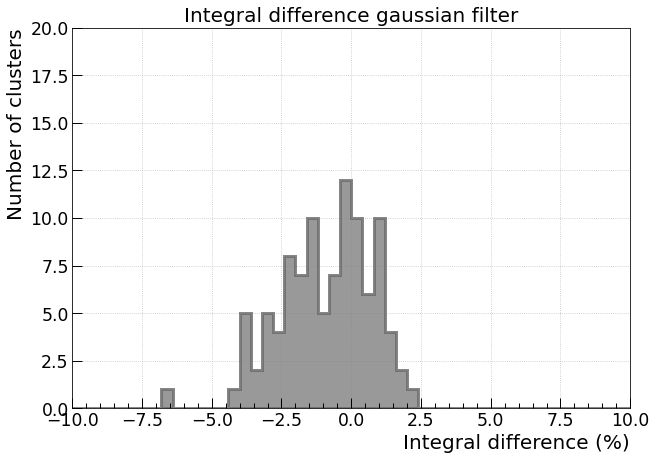

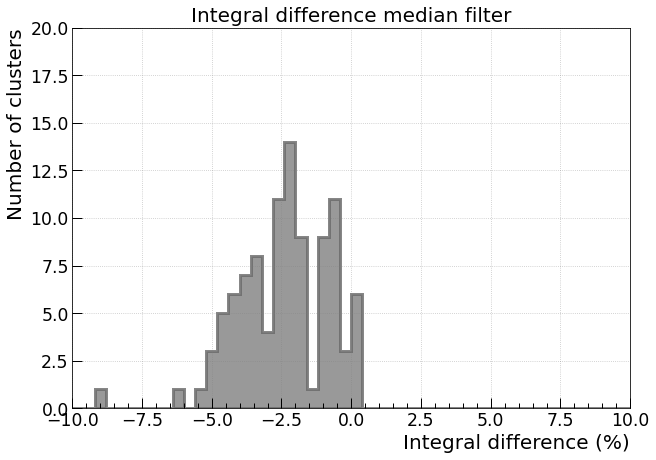

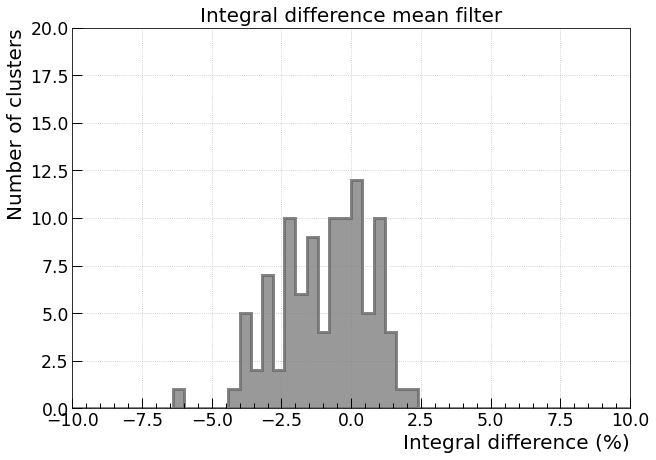

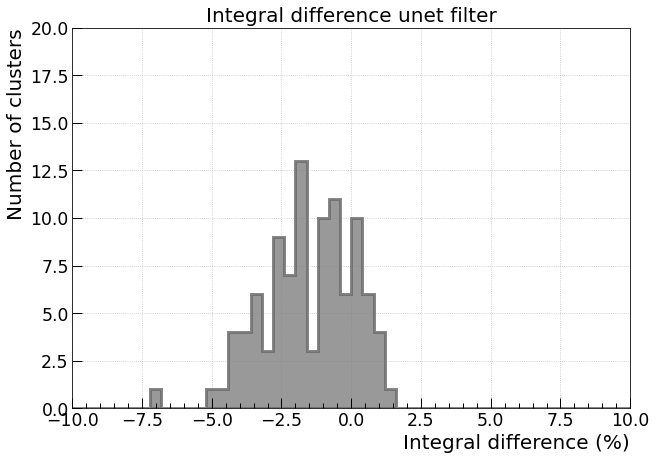

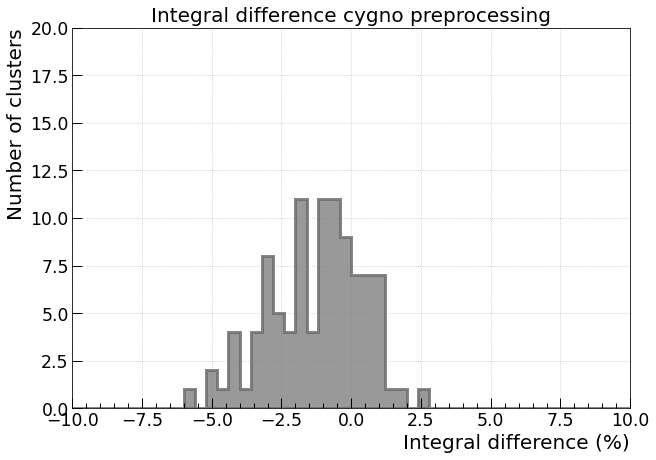

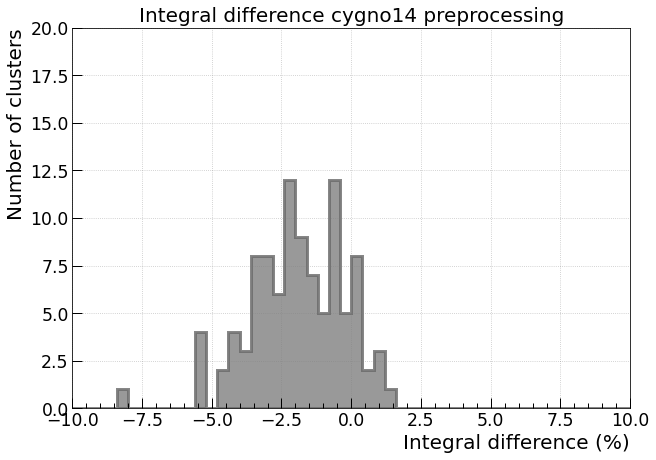

In [23]:
for i in range(len(filter_list)):
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(0,0,'w',marker=None)
    
    plt.hist(diffs[i], bins=50, range=[-10,10], histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)
    
    if i < 4:
        plt.title("Integral difference %s filter" %(filter_list[i]),fontsize =font)     
    else:
        plt.title("Integral difference %s preprocessing" %(filter_list[i]),fontsize =font) 
    
    plt.xlabel("Integral difference (%)",fontsize=font, horizontalalignment='right', x=1.0)
    plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
    plt.grid(color='gray', linestyle=':', alpha = 0.5)
    plt.xlim([-10,10])
    #plt.ylim([0,60])
    plt.ylim([0,20])
    #plt.yscale("log")

    ax = plt.gca()
    ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='major',direction="in", length=10, width=1)
    ax.tick_params(which='minor',direction="in", length=5, width=1)